# 주제 : 설빙은 정말 2층에 많이 입점되어있을까?

https://www.mk.co.kr/news/business/view/2018/10/645064/

In [1]:
#라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [2]:
# 글씨체 설정
from IPython.display import set_matplotlib_formats

plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

set_matplotlib_formats('retina')

In [3]:
# 경고 메세지 제거
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

In [4]:
df = pd.read_csv('./data/소상공인시장진흥공단_상가업소정보_201806_01.csv', encoding='cp949')
print(df.shape)
df.head()

(476183, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284
1,28498271,비비안아울렛중계점,아울렛중계점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1135010600105090000010511,2001아울렛,서울특별시 노원구 동일로204가길 46,139726,1783.0,NaN,3,NaN,127.067888,37.641280
2,28512174,연세정신건강의학과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,1111017400102990000005842,유림문화사,서울특별시 종로구 종로 335-3,110540,3104.0,NaN,2,NaN,127.014500,37.573196
3,28499926,독일지멘스보청기은평점,은평점,D,소매,D20,의약/의료품소매,D20A02,보청기판매,G47812,...,1138010300102810108040063,NaN,서울특별시 은평구 통일로 732,122040,3368.0,NaN,2,NaN,126.929871,37.610888
4,28490321,서울모드,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010700105170027011767,SM빌딩,서울특별시 강남구 도산대로11길 29,135888,6034.0,NaN,1,NaN,127.022212,37.519315


In [5]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476183 entries, 0 to 476182
Data columns (total 39 columns):
상가업소번호       476183 non-null int64
상호명          476182 non-null object
지점명          60122 non-null object
상권업종대분류코드    476183 non-null object
상권업종대분류명     476183 non-null object
상권업종중분류코드    476183 non-null object
상권업종중분류명     476183 non-null object
상권업종소분류코드    476183 non-null object
상권업종소분류명     476183 non-null object
표준산업분류코드     448519 non-null object
표준산업분류명      448519 non-null object
시도코드         476183 non-null int64
시도명          476183 non-null object
시군구코드        476183 non-null int64
시군구명         476183 non-null object
행정동코드        476183 non-null int64
행정동명         476183 non-null object
법정동코드        476183 non-null int64
법정동명         476183 non-null object
지번코드         476183 non-null int64
대지구분코드       476183 non-null int64
대지구분명        476183 non-null object
지번본번지        476183 non-null int64
지번부번지        395584 non-null float64
지번주소         476183 non-null obje

서울/부산 지역의 설빙 지점만 파악하기

In [7]:
# 원래 잘 작동하던 코드인데 "cannot index with vector containing NA / NaN values" 문구와 함께 무한 에러가 떴다. 
#na=False 추가를 통해 해결했다....

df_sulbing = df[df['상호명'].str.contains('설빙|sulbing', na=False)] 
print(df_sulbing.shape)
df_sulbing.head()

(66, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
7811,23431304,설빙,강남역2호점,Q,음식,Q09,유흥주점,Q09A08,빠/카페/스탠드빠,I56211,...,1168010100108100005000001,반석빌딩,서울특별시 강남구 봉은사로2길 21,135080,6123.0,NaN,2,NaN,127.026119,37.503317
7848,23343143,설빙,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1159010900107080000000001,해태보라매타워,서울특별시 동작구 보라매로3길 29,156010,7071.0,1,2,NaN,126.924830,37.491184
23964,23235850,설빙강남역점,강남역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106190004026220,장연빌딩,서울특별시 강남구 강남대로102길 14,135080,6128.0,NaN,2,NaN,127.026985,37.501892
24054,23332885,김해공항설빙,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2644010200121920000000001,NaN,부산광역시 강서구 공항진입로 108,618702,46718.0,NaN,1,NaN,128.945756,35.172733
33110,25562836,국제설빙고,NaN,Q,음식,Q09,유흥주점,Q09A08,빠/카페/스탠드빠,I56211,...,2623010300101270000033945,NaN,부산광역시 부산진구 중앙대로756번길 10,614030,47245.0,NaN,2,NaN,129.061213,35.159436


결측치(층정보가 없는) 제거

In [8]:
df_sulbing[df_sulbing['층정보'].isnull()].shape

(20, 39)

In [9]:
print(df_sulbing.shape)
df_sulbing = df_sulbing.dropna(subset=['층정보'])
print(df_sulbing.shape)

(66, 39)
(46, 39)


일반 빙수집도 똑같이 진행

In [10]:
df_bingsu = df[df['상호명'].str.contains('빙수',na=False)]
print(df_bingsu.shape)
df_bingsu.head()

(55, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
12108,20078340,빙수빙수악마떡볶이방학본점,방학본점,Q,음식,Q04,분식,Q04A03,떡볶이전문,I56194,...,1132010600106950008003430,NaN,서울특별시 도봉구 도당로 76,132020,1343.0,NaN,1,NaN,127.036087,37.664586
24725,23446089,하얀숲단팥죽팥빙수,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2638010200103260001001722,청조맨션,부산광역시 사하구 제석로18번길 48,604830,49411.0,NaN,1,NaN,128.973477,35.102790
24931,23500943,소문난팥빙수,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2629010600113790014005294,청해횟집,부산광역시 남구 수영로 205-10,608020,48445.0,NaN,1,NaN,129.088971,35.135492
34772,23757740,북해빙수,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1165010700100190003000001,센트럴시티빌딩,서울특별시 서초구 신반포로 176,137726,6546.0,NaN,NaN,NaN,127.002393,37.503930
57360,23422242,커피N빙수,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1138010800100380007018718,NaN,서울특별시 은평구 진흥로1길 15,122899,3407.0,NaN,1,102,126.918517,37.601847


In [11]:
df_bingsu[df_bingsu['층정보'].isnull()].shape

(30, 39)

In [12]:
print(df_bingsu.shape)
df_bingsu = df_bingsu.dropna(subset=['층정보'])
print(df_bingsu.shape)

(55, 39)
(25, 39)


In [13]:
df_bingsu['층정보(int)'] = ''

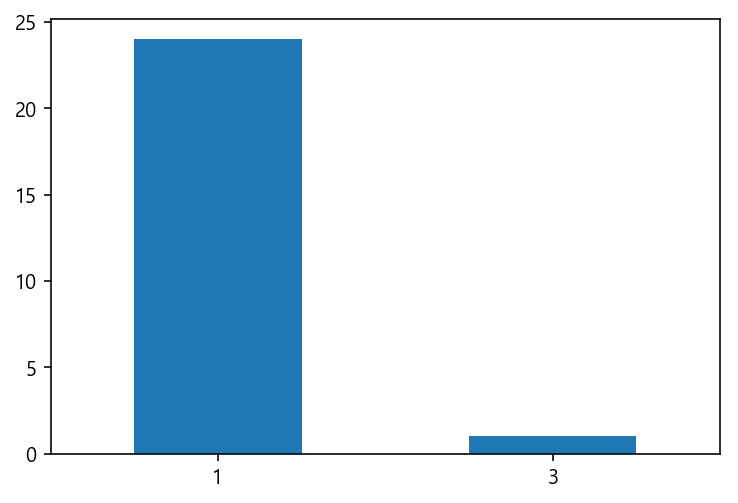

In [14]:
df_bingsu['층정보'].value_counts().plot.bar(rot=0)

In [15]:
df_sulbing['층정보'].value_counts()

2    37
1     5
3     3
5     1
Name: 층정보, dtype: int64

In [16]:
df_sulbing['층정보'].value_counts(normalize = True)

2    0.804348
1    0.108696
3    0.065217
5    0.021739
Name: 층정보, dtype: float64

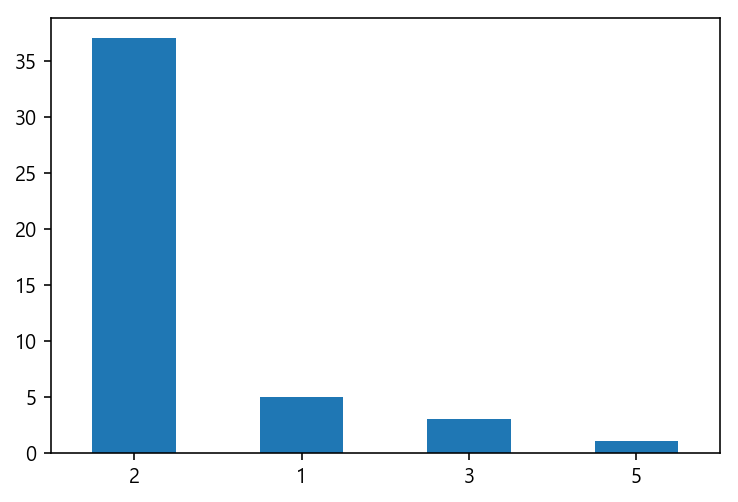

In [17]:
df_sulbing['층정보'].value_counts().plot.bar(rot=0)

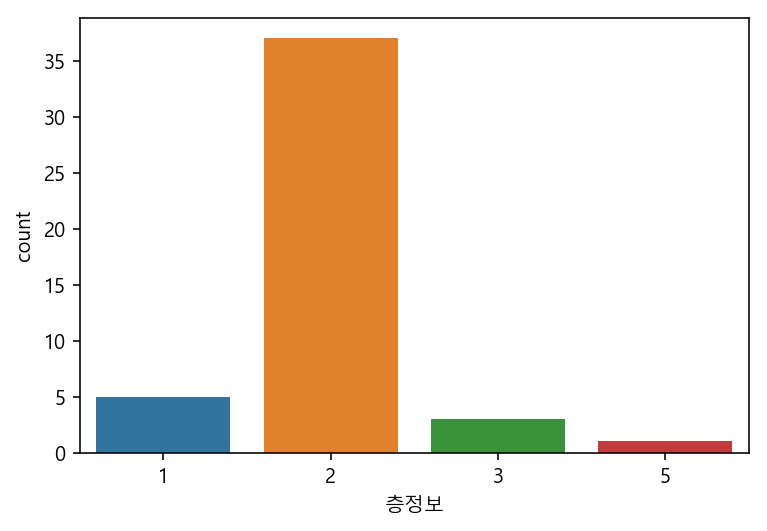

In [18]:
sns.countplot(data=df_sulbing, x='층정보')

In [19]:
int(df_bingsu['층정보'][12108])

1

In [20]:
for n in df_bingsu.index :
    df_bingsu['층정보(int)'] = df_bingsu['층정보'][n]


df_bingsu.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,층정보(int)
12108,20078340,빙수빙수악마떡볶이방학본점,방학본점,Q,음식,Q04,분식,Q04A03,떡볶이전문,I56194,...,NaN,서울특별시 도봉구 도당로 76,132020,1343.0,NaN,1,NaN,127.036087,37.664586,1
24725,23446089,하얀숲단팥죽팥빙수,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,청조맨션,부산광역시 사하구 제석로18번길 48,604830,49411.0,NaN,1,NaN,128.973477,35.102790,1
24931,23500943,소문난팥빙수,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,청해횟집,부산광역시 남구 수영로 205-10,608020,48445.0,NaN,1,NaN,129.088971,35.135492,1
57360,23422242,커피N빙수,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,서울특별시 은평구 진흥로1길 15,122899,3407.0,NaN,1,102,126.918517,37.601847,1
98735,23290619,토곡팥빙수,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,NaN,부산광역시 연제구 토곡남로 7,611080,47588.0,NaN,1,NaN,129.106488,35.181241,1


In [21]:
df_all = df[df['상호명'].str.contains('설빙|sulbing|빙수|binsu', na=False)]
print(df_all.shape)
df_all.head()

(121, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
7811,23431304,설빙,강남역2호점,Q,음식,Q09,유흥주점,Q09A08,빠/카페/스탠드빠,I56211,...,1168010100108100005000001,반석빌딩,서울특별시 강남구 봉은사로2길 21,135080,6123.0,NaN,2,NaN,127.026119,37.503317
7848,23343143,설빙,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1159010900107080000000001,해태보라매타워,서울특별시 동작구 보라매로3길 29,156010,7071.0,1,2,NaN,126.924830,37.491184
12108,20078340,빙수빙수악마떡볶이방학본점,방학본점,Q,음식,Q04,분식,Q04A03,떡볶이전문,I56194,...,1132010600106950008003430,NaN,서울특별시 도봉구 도당로 76,132020,1343.0,NaN,1,NaN,127.036087,37.664586
23964,23235850,설빙강남역점,강남역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106190004026220,장연빌딩,서울특별시 강남구 강남대로102길 14,135080,6128.0,NaN,2,NaN,127.026985,37.501892
24054,23332885,김해공항설빙,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2644010200121920000000001,NaN,부산광역시 강서구 공항진입로 108,618702,46718.0,NaN,1,NaN,128.945756,35.172733


In [22]:
df_all['구분']=''

In [23]:
df_all.loc[df_all['상호명'].str.contains('설빙|sulbing', na=False), '구분'] = '설빙'
df_all.loc[~df_all['상호명'].str.contains('설빙|sulbing', na=False), '구분'] = '일반빙수'
df_all.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,구분
7811,23431304,설빙,강남역2호점,Q,음식,Q09,유흥주점,Q09A08,빠/카페/스탠드빠,I56211,...,반석빌딩,서울특별시 강남구 봉은사로2길 21,135080,6123.0,NaN,2,NaN,127.026119,37.503317,설빙
7848,23343143,설빙,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,해태보라매타워,서울특별시 동작구 보라매로3길 29,156010,7071.0,1,2,NaN,126.924830,37.491184,설빙
12108,20078340,빙수빙수악마떡볶이방학본점,방학본점,Q,음식,Q04,분식,Q04A03,떡볶이전문,I56194,...,NaN,서울특별시 도봉구 도당로 76,132020,1343.0,NaN,1,NaN,127.036087,37.664586,일반빙수
23964,23235850,설빙강남역점,강남역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,장연빌딩,서울특별시 강남구 강남대로102길 14,135080,6128.0,NaN,2,NaN,127.026985,37.501892,설빙
24054,23332885,김해공항설빙,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,부산광역시 강서구 공항진입로 108,618702,46718.0,NaN,1,NaN,128.945756,35.172733,설빙


In [24]:
df_all['구분'].value_counts()

설빙      66
일반빙수    55
Name: 구분, dtype: int64

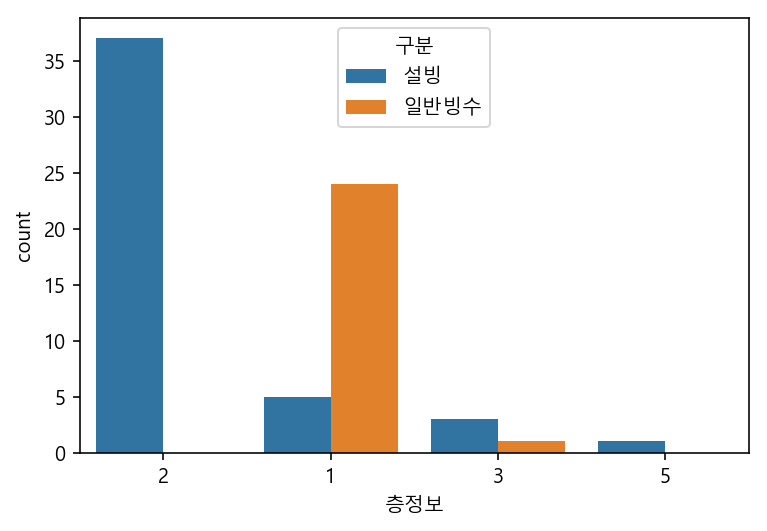

In [25]:
sns.countplot(data=df_all, x='층정보', hue='구분')

결론 : 서울, 부산 지역 46개의 설빙 중 37개 지점이 2층에 위치. 즉 전체 80.4%의 설빙이 2층에 존재하는 것으로 확인.(기사 팩트)
반면 설빙 이외의 빙수 전문점들은 대체적으로 1층에 입점한것으로 확인

# -------- [추가] ------ 
* 층정보를 int로 변환하기 위한 코드
(그래프가 반드시 int로만 그려지는 것으로 착각해서 object -> int 전환 시도)

In [26]:
int(df_bingsu['층정보'][12108])

1

In [27]:
for n in df_bingsu.index :
    df_bingsu['층정보(int)'] = df_bingsu['층정보'][n]


df_bingsu.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,층정보(int)
12108,20078340,빙수빙수악마떡볶이방학본점,방학본점,Q,음식,Q04,분식,Q04A03,떡볶이전문,I56194,...,NaN,서울특별시 도봉구 도당로 76,132020,1343.0,NaN,1,NaN,127.036087,37.664586,1
24725,23446089,하얀숲단팥죽팥빙수,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,청조맨션,부산광역시 사하구 제석로18번길 48,604830,49411.0,NaN,1,NaN,128.973477,35.102790,1
24931,23500943,소문난팥빙수,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,청해횟집,부산광역시 남구 수영로 205-10,608020,48445.0,NaN,1,NaN,129.088971,35.135492,1
57360,23422242,커피N빙수,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,서울특별시 은평구 진흥로1길 15,122899,3407.0,NaN,1,102,126.918517,37.601847,1
98735,23290619,토곡팥빙수,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,NaN,부산광역시 연제구 토곡남로 7,611080,47588.0,NaN,1,NaN,129.106488,35.181241,1
